#### Salary in Data Science

What can we learn from this dataset? 

Downloaded from [here](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023) this dataset contains multiple descriptive features of the annual salary capturing jobs in the US, in Europe and several countries in asia.

Let's explore a little to find out more about it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ds_salaries.csv')
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


First problem: there are multiple currencies representing a different value as salary. 
Lucky enough, the authors already provided a comparable value in 'salary_in_usd'. We go by this and use salary_currency as regional marker.

In [4]:
df.groupby('salary_currency').size()

salary_currency
AUD       9
BRL       6
CAD      25
CHF       4
CLP       1
CZK       1
DKK       3
EUR     236
GBP     161
HKD       1
HUF       3
ILS       1
INR      60
JPY       3
MXN       1
PLN       5
SGD       6
THB       2
TRY       3
USD    3224
dtype: int64

In [6]:
# to get a concise understanding of this, we need to group certai currenncies together
# lets group everything below 25

# --> AUD = australia dollar,
# USD = us,
# EUR = euro,
# CAD = canadian dollar,
# GBP = british pound,
# BRL = brazilian real,
# CHF = swiss franc,
# CLP = chilean peso,
# CZK = czech koruna,
# DKK = danish krone, 
# HKD = hong kong dollar,
# HUF = forint (hungary), 
# ILS = israeli shekel,
# INR = indian rupia, 
# JPY = japanese yen, 
# MXN = mexican peso, 
# PLN = polish zloty, 
# SGD = singapur dollar, 
# THB = bath (thai), 
# TRY = turkey lira

# resulting regions are hence: latin america, europe, near east, asia, australia

df['currency_region'] = df.replace({'salary_currency': {'USD': 'us', 'CAD': 'canada', 'GBP': 'britain', 'EUR': 'europe' ,'AUD': 'australia', 'BRL': 'latin america', 'CHF': 'europe', 'CLP': 'latin america', 'CZK': 'europe', 'DKK': 'europe', 'HKD': 'northern asia', 'HUF': 'europe', 'ILS': 'near east', 'JPY': 'northern asia', 'INR': 'south asia', 'MXN': 'latin america', 'PLN': 'europe', 'SGD': 'northern asia', 'THB': 'south asia', 'TRY': 'near east'}})['salary_currency']

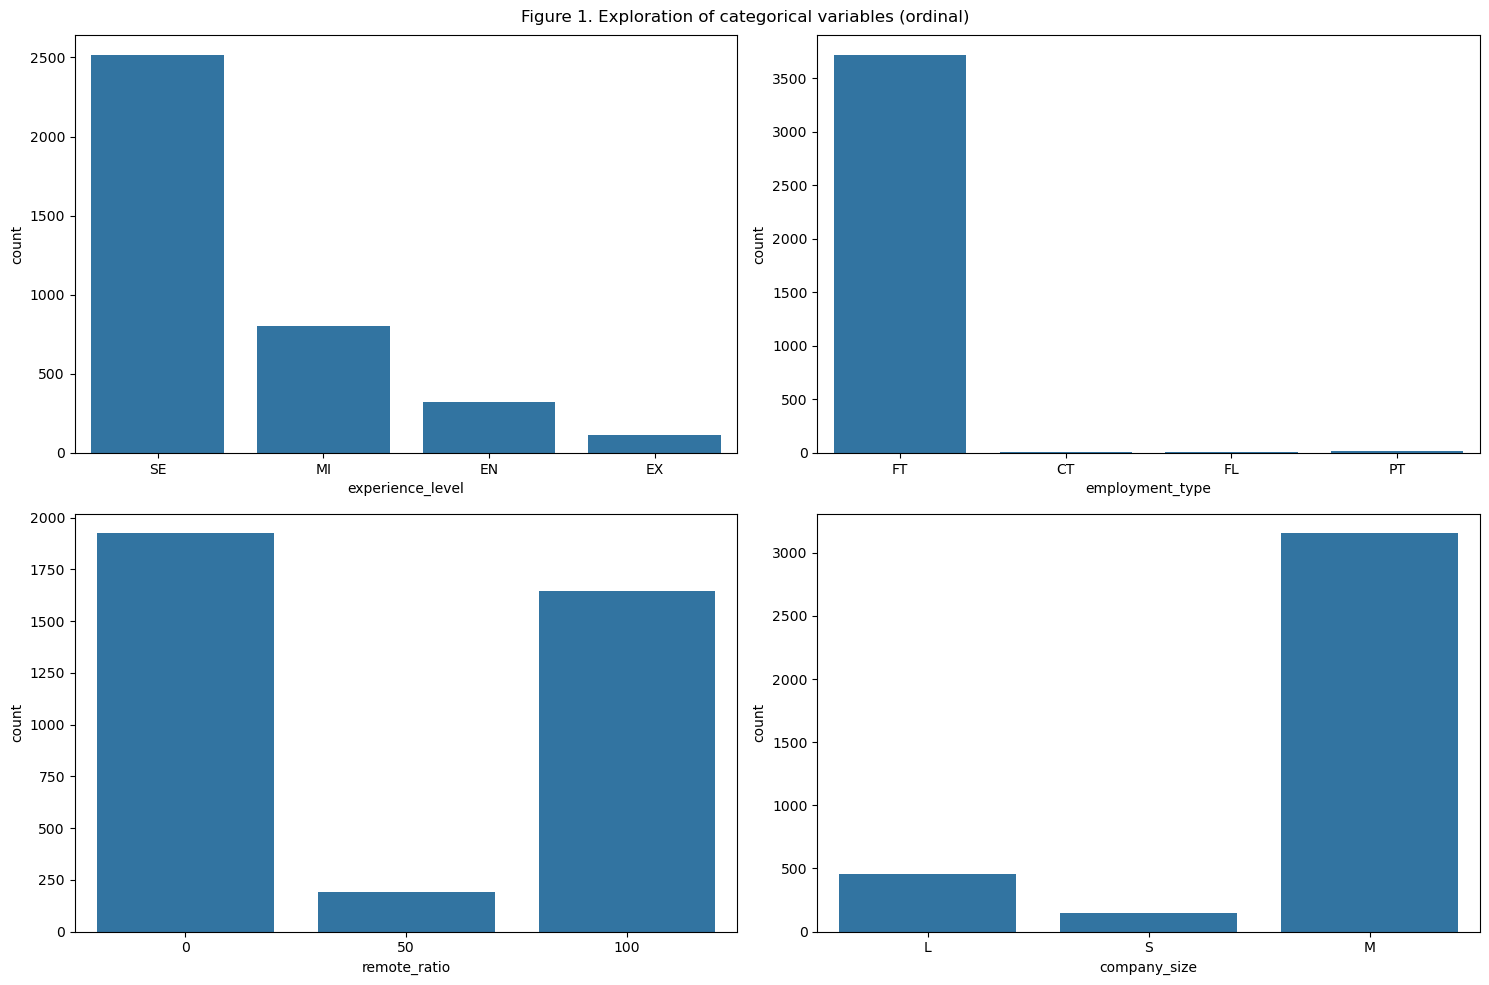

In [7]:
# lets explore categorical variables: experience, employment_type, remote_ratio, company_size (ordinal)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
vars = ['experience_level', 'employment_type', 'remote_ratio', 'company_size']
for i, var in enumerate(vars):
    row, col = divmod(i, 2)
    sns.countplot(x=var, data=df, ax=axs[row, col])
plt.suptitle('Figure 1. Exploration of categorical variables (ordinal)')
plt.tight_layout()
plt.show()


The experience level contains mostly employees of the level 'senior', while there are some 'middle-experienced' workers, few at entry level and just a hundred experts. 

The type of employment contains almost only full time employees. There is not much to gain from this variable.

The remote ratio focuses on either 0% remote work or 100% remote work with moderately many hybrid contracts.

Moreover, the company size is rather unbalanced tending to contain dominantly middle-sized enterprises.


When observing results about 1, 3 or 4, the prior ratio has to be used in order to normalize/balance that result.

In [8]:
# now nominal variables: region, job_title, work_year, salary_currency, employee_residence, company_location
print("Number of items for each Category:")
vars = ['currency_region', 'job_title', 'work_year', 'salary_currency', 'employee_residence', 'company_location']
for i in vars:
    print(f"Job: {i} and count: {df[i].nunique()}")

Number of items for each Category:
Job: currency_region and count: 9
Job: job_title and count: 93
Job: work_year and count: 4
Job: salary_currency and count: 20
Job: employee_residence and count: 78
Job: company_location and count: 72


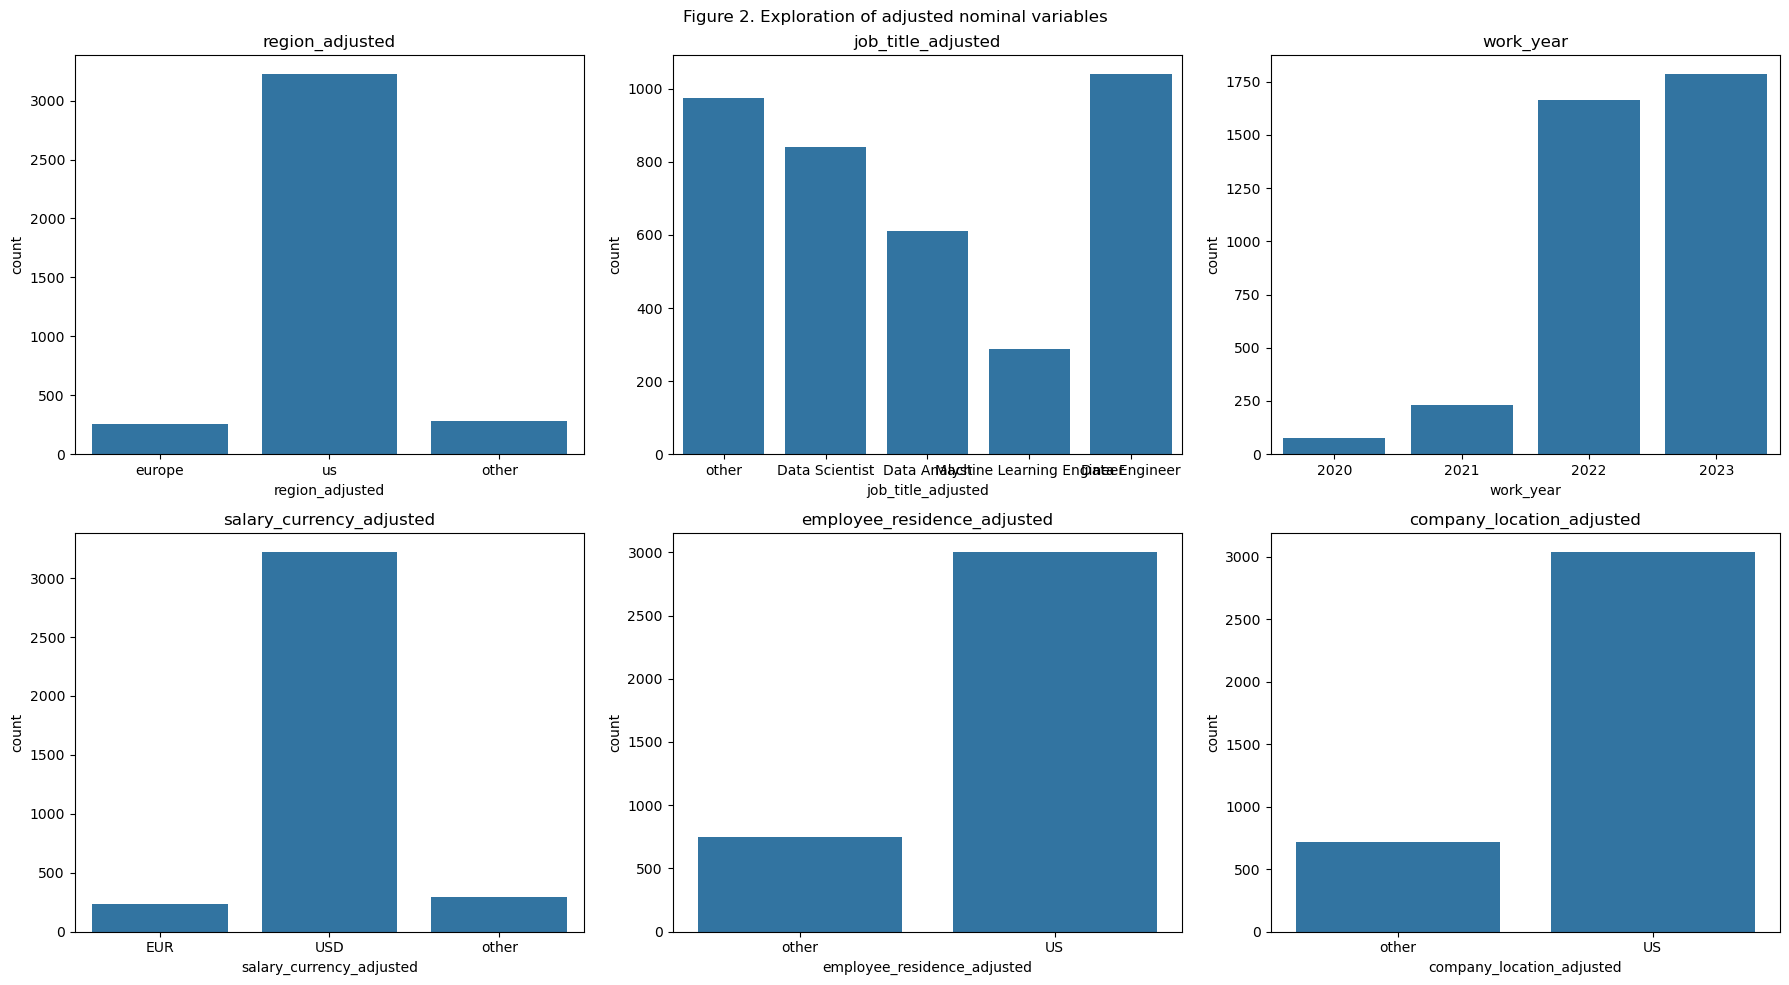

In [9]:
# even 20 is too much --> proceed by grouping according to percentage

df['company_location_adjusted'] = np.where(df['company_location'].map(df['company_location'].value_counts(normalize=True)) < 0.05, 'other', df['company_location'])
df['region_adjusted'] = np.where(df['currency_region'].map(df['currency_region'].value_counts(normalize=True)) < 0.05, 'other', df['currency_region'])
vars = ['region_adjusted', 'job_title_adjusted', 'work_year', 'salary_currency_adjusted', 'employee_residence_adjusted', 'company_location_adjusted']
df['job_title_adjusted'] = np.where(df['job_title'].map(df['job_title'].value_counts(normalize=True)) < 0.05, 'other', df['job_title'])
df['salary_currency_adjusted'] = np.where(df['salary_currency'].map(df['salary_currency'].value_counts(normalize=True)) < 0.05, 'other', df['salary_currency'])
df['employee_residence_adjusted'] = np.where(df['employee_residence'].map(df['employee_residence'].value_counts(normalize=True))< 0.05, 'other', df['employee_residence'])

fig, axs = plt.subplots(2,3, figsize=(18, 10))
vars = ['region_adjusted', 'job_title_adjusted', 'work_year', 'salary_currency_adjusted', 'employee_residence_adjusted', 'company_location_adjusted']

for i, var in enumerate(vars):
    row, col = divmod(i, 3)
    axs[row, col].set_title(var)
    sns.countplot(x=var, data=df, ax=axs[row, col])
    
    
plt.suptitle('Figure 2. Exploration of adjusted nominal variables')
plt.tight_layout()
plt.show()

#### Hypothesis

Rather than looking for a finding, testing hypotheses may be more enlightening and straightforward.

After consulting with a chatbot that shall not be mentioned, the resulting set seems promising and will be tested for:

*Location Hypothesis: The location of residence does not significantly affect the salary, but the location of the company does.*

*Factors that influence salary are (1) the level of experience represented by certain words in the (2) job title.*

*The work year is an indicator of the demand for data science jobs, having a positive effect on the expected salary.*

*The type of employment separates the salary into clearly discernible groups.*

*The interplay of remote work, salary currency, and employee residence carries information likely predictive of the salary for the majority of this subpopulation for certain regions.*

----

*Let's start with those and see where this arrives.*

In [10]:
df = df.drop(['company_location_adjusted', 'region_adjusted', 'job_title_adjusted',
       'salary_currency_adjusted', 'employee_residence_adjusted', 'salary_currency'], axis=1)


# define a function that applies 'other' for too little categorical data points

def adjust_categories(df, column, threshold=0.01):
    counts = df[column].value_counts(normalize=True)
    df[f'{column}'] = np.where(df[column].map(counts) < threshold, 'other', df[column])

    return df

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    df = adjust_categories(df, column)


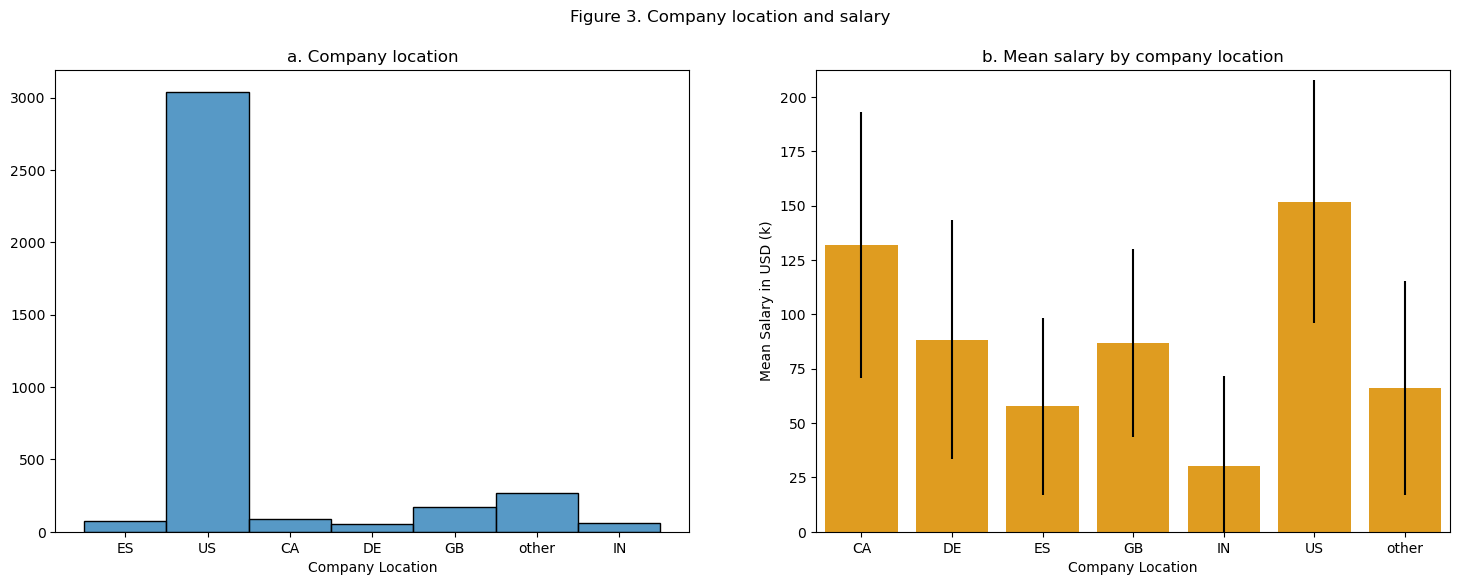

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Histogram of company_location_adjusted
sns.histplot(df['company_location'], ax=axs[0])

# Plot 2: Mean salary by company_location_adjusted
mean_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
mean_salary_by_location['salary_in_usd'] /= 1000

sns.barplot(x='company_location', y='salary_in_usd', data=mean_salary_by_location, ax=axs[1], color='orange', yerr=df.groupby('company_location')['salary_in_usd'].std() / 1000)
axs[1].set_ylim(0, mean_salary_by_location['salary_in_usd'].max() * 1.4)
# Set labels for each subfigure
axs[0].set_xlabel('Company Location')
axs[0].set_ylabel('')
axs[0].set_title('a. Company location')

axs[1].set_title('b. Mean salary by company location')
axs[1].set_ylabel('Mean Salary in USD (k)')
axs[1].set_xlabel('Company Location')
plt.suptitle('Figure 3. Company location and salary')
plt.show()

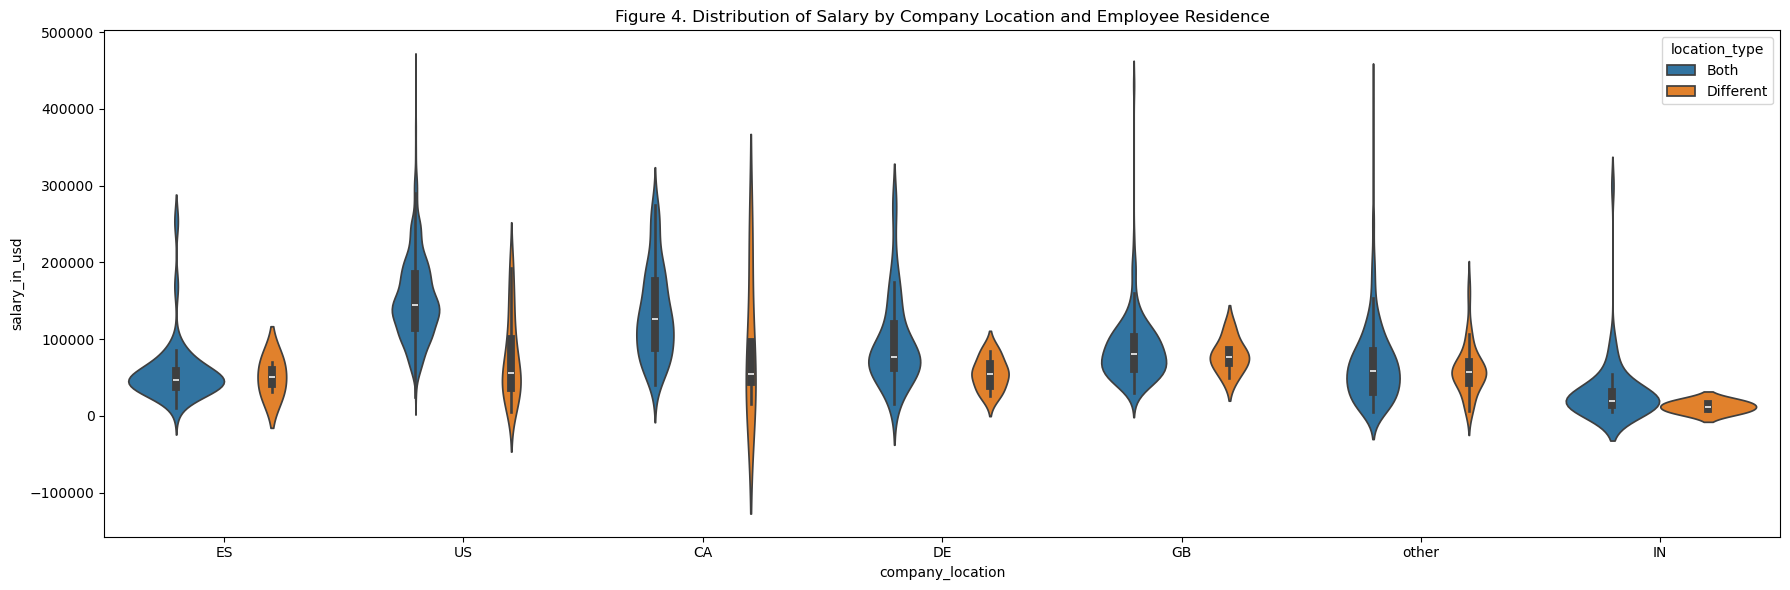

In [12]:
fig, ax = plt.subplots(figsize=(18, 6))

# Combine company_location and employee_residence into a single column for hue
df['location_type'] = np.where(df['company_location'] == df['employee_residence'], 'Both', 'Different')

# Plot the violin plot with hue
sns.violinplot(x='company_location', y='salary_in_usd', hue='location_type', data=df, split=False, ax=ax)
# split provides two separate violins for each hue category
ax.set_title('Figure 4. Distribution of Salary by Company Location and Employee Residence')

plt.tight_layout()
plt.show()


**It is visible that many companies tend to pay employees in the same country more than those in foreign countries (with the exception of canada (Figure 4.)).** This is more or less pronounced overall considering the mean and quartiles, e.g. US and DE. 

The absolute margins seem to support the thesis, that in country employees can earn the most compared to others.

Figure 3 tells us that salary levels are higher in the US compared to other countries and figure 4 tells us, that considering the abundance of company locations inside the US, they profit from they off-country employees by paying them considerable less than home-land ones.

**However, the percentage of company locations outside the US makes it hard to evaluate the other locations in with respect to their employee residence and salary level.**


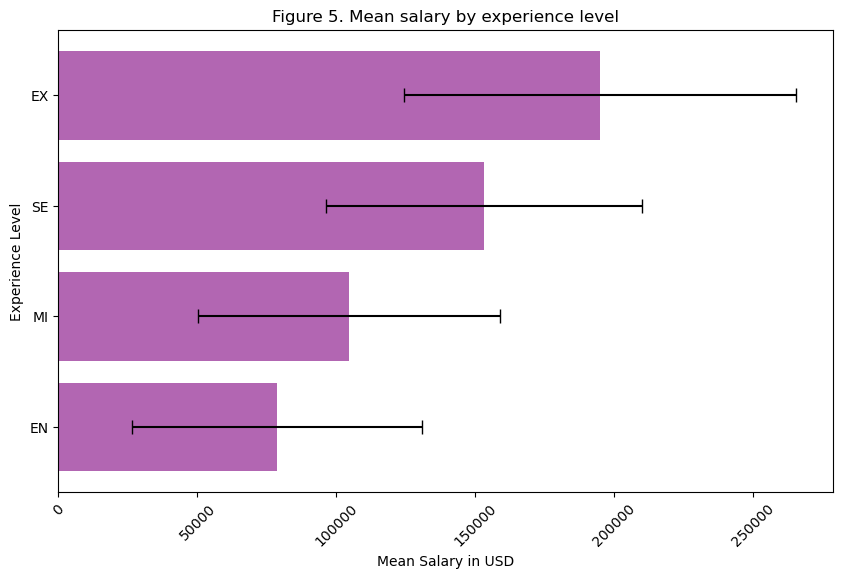

In [13]:
# experience level

# Calculate means and standard deviations
means = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True)
stds = df.groupby('experience_level')['salary_in_usd'].std().sort_values(ascending=True)

# Plot with error bars
plt.figure(figsize=(10, 6))
plt.barh(y=means.index, width=means, xerr=stds, capsize=5, color='purple', alpha=0.6)
plt.title('Figure 5. Mean salary by experience level')
plt.xlabel('Mean Salary in USD')
plt.ylabel('Experience Level')

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()

This turns out to be very congruent with our understanding of the experience levels expert, senior, middle and entry level.

In [14]:
# job title
df.job_title.value_counts()

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
other                         572
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Applied Scientist              58
Data Science Manager           58
Name: count, dtype: int64

In [16]:
# extract most common terms
most_freq_terms = df.job_title.str.extractall(r'(\b\w+\b)').value_counts().head()
most_freq_terms

0        
Data         2651
Engineer     1432
Scientist     980
Analyst       612
other         572
Name: count, dtype: int64

In [19]:
# use these terms to find significant overlap with the payments (salary_in_usd) or the experience level

# Count the number of term occurrences in the highest experience_level
highest_experience_level = df['experience_level'].value_counts().idxmax()
term_counts = {}

for term in most_freq_terms.index:
    term_counts[term[0]] = df[df['experience_level'] == highest_experience_level]['job_title'].str.contains(term[0], case=False).sum()

# Convert term counts to percentages
total_highest_experience = df[df['experience_level'] == highest_experience_level].shape[0]
# Iterate over all experience levels
for level in df['experience_level'].unique():
    print(f"Processing experience level: {level}")
    
    # Count the number of term occurrences in the current experience level
    term_counts = {}
    for term in most_freq_terms.index:
        term_counts[term[0]] = df[df['experience_level'] == level]['job_title'].str.contains(term[0], case=False).sum()
    
    # Convert term counts to percentages
    total_experience = df[df['experience_level'] == level].shape[0]
    term_percentages = {term: (count / total_experience) * 100 for term, count in term_counts.items()}
    
    # Reorder experience levels
    experience_order = ['EX', 'SE', 'MI', 'EN']
    term_percentages = {term: term_percentages[term] for term in experience_order if term in term_percentages}
    term_percentages = {term: (count / total_experience) * 100 for term, count in term_counts.items()}
    
    print(term_percentages)



# Define salary bins
salary_bins = pd.cut(df['salary_in_usd'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, np.inf], labels=['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-350k', '350-400k', '400-450k', '450-500k', '500k+'])

# Add the salary bins to the dataframe
df['salary_bin'] = salary_bins

# Iterate over all salary bins
for bin in df['salary_bin'].unique():
    print(f"Processing salary bin: {bin}")
    
    # Count the number of term occurrences in the current salary bin
    term_counts = {}
    for term in most_freq_terms.index:
        term_counts[term[0]] = df[df['salary_bin'] == bin]['job_title'].str.contains(term[0], case=False).sum()
    
    # Convert term counts to percentages
    total_in_bin = df[df['salary_bin'] == bin].shape[0]
    term_percentages = {term: (count / total_in_bin) * 100 for term, count in term_counts.items()}
    
    print(term_percentages)


Processing experience level: SE
{'Data': 73.25119236883943, 'Engineer': 40.06359300476948, 'Scientist': 28.17965023847377, 'Analyst': 15.103338632750399, 'other': 11.208267090620032}
Processing experience level: MI
{'Data': 68.07453416149069, 'Engineer': 34.40993788819876, 'Scientist': 22.857142857142858, 'Analyst': 20.74534161490683, 'other': 20.124223602484474}
Processing experience level: EN
{'Data': 58.75, 'Engineer': 27.500000000000004, 'Scientist': 23.125, 'Analyst': 19.6875, 'other': 29.6875}
Processing experience level: EX
{'Data': 63.1578947368421, 'Engineer': 51.75438596491229, 'Scientist': 11.403508771929824, 'Analyst': 1.7543859649122806, 'other': 28.947368421052634}
Processing salary bin: 50-100k
{'Data': 73.22540473225405, 'Engineer': 33.25031133250312, 'Scientist': 18.43088418430884, 'Analyst': 28.6425902864259, 'other': 18.43088418430884}
Processing salary bin: 0-50k
{'Data': 59.58188153310105, 'Engineer': 20.557491289198605, 'Scientist': 28.57142857142857, 'Analyst': 1

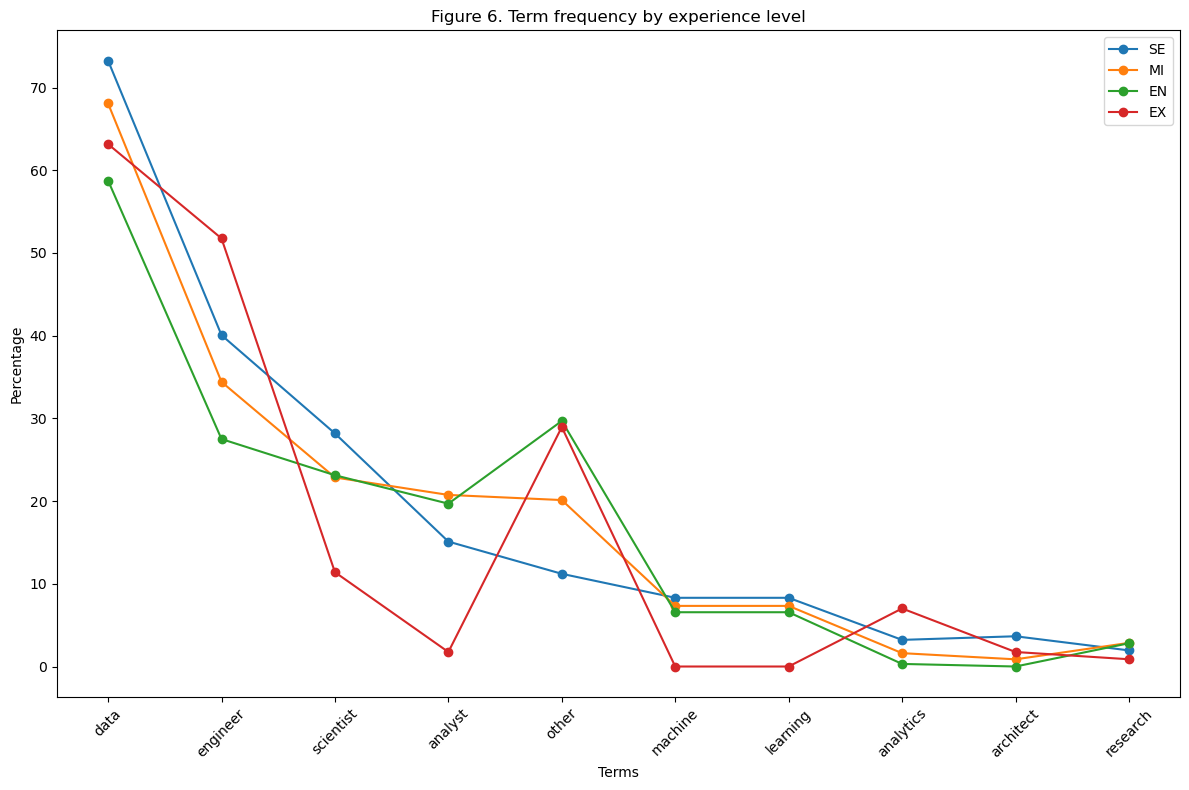

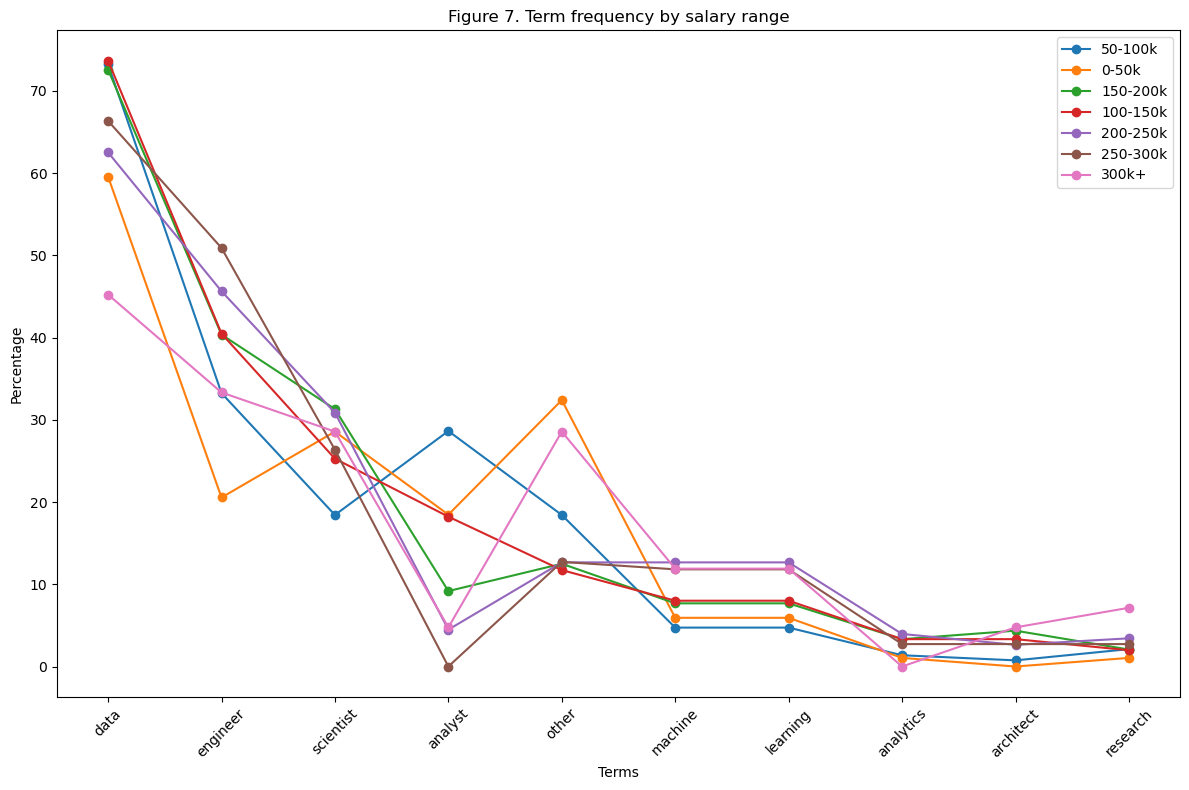

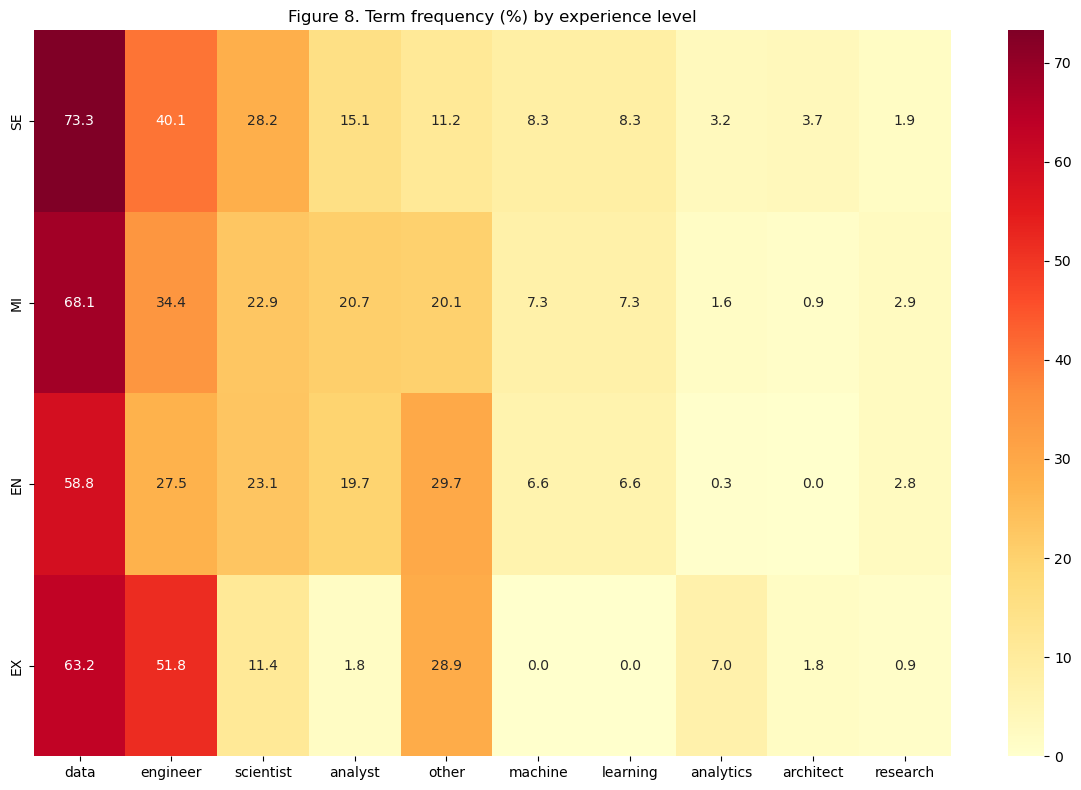

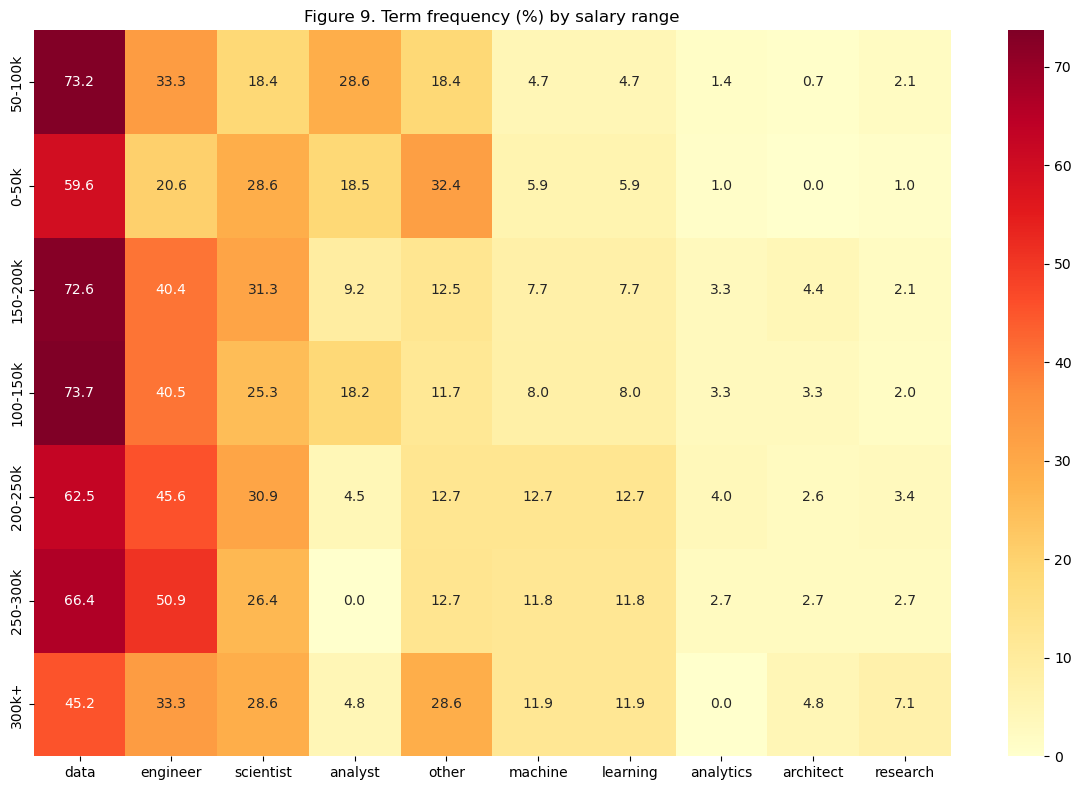

Term frequency by experience level:
         data   engineer  scientist    analyst      other   machine  learning  \
SE  73.251192  40.063593  28.179650  15.103339  11.208267  8.306836  8.306836   
MI  68.074534  34.409938  22.857143  20.745342  20.124224  7.329193  7.329193   
EN  58.750000  27.500000  23.125000  19.687500  29.687500  6.562500  6.562500   
EX  63.157895  51.754386  11.403509   1.754386  28.947368  0.000000  0.000000   

    analytics  architect  research  
SE   3.219396   3.656598  1.947536  
MI   1.614907   0.869565  2.857143  
EN   0.312500   0.000000  2.812500  
EX   7.017544   1.754386  0.877193  

Term frequency by salary range:
               data   engineer  scientist    analyst      other    machine  \
50-100k   73.225405  33.250311  18.430884  28.642590  18.430884   4.732254   
0-50k     59.581882  20.557491  28.571429  18.466899  32.404181   5.923345   
150-200k  72.591743  40.366972  31.307339   9.174312  12.500000   7.683486   
100-150k  73.692552  40.4912

In [20]:
# Find most frequent terms
from collections import Counter

def get_most_frequent_terms(df, column='job_title', n=10):
    all_words = ' '.join(df[column]).lower().split()
    return pd.Series(dict(Counter(all_words).most_common(n)))

most_freq_terms = get_most_frequent_terms(df)

# Function to calculate term percentages for a given subset of data
def calculate_term_percentages(subset_df):
    term_counts = {}
    for term in most_freq_terms.index:
        term_counts[term] = subset_df['job_title'].str.contains(term, case=False).sum()
    total_count = len(subset_df)
    return {term: (count / total_count) * 100 for term, count in term_counts.items()}

# Analyze terms by experience level
experience_term_percentages = {}
for level in df['experience_level'].unique():
    subset = df[df['experience_level'] == level]
    experience_term_percentages[level] = calculate_term_percentages(subset)

# Visualize terms by experience level
plt.figure(figsize=(12, 8))
for level, percentages in experience_term_percentages.items():
    plt.plot(percentages.keys(), percentages.values(), label=level, marker='o')
plt.title('Figure 6. Term frequency by experience level')
plt.xlabel('Terms')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Define salary bins
salary_bins = pd.cut(df['salary_in_usd'], 
                     bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, np.inf], 
                     labels=['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300k+'])
df['salary_bin'] = salary_bins

# Analyze terms by salary bin
salary_term_percentages = {}
for bin in df['salary_bin'].unique():
    subset = df[df['salary_bin'] == bin]
    salary_term_percentages[bin] = calculate_term_percentages(subset)

# Visualize terms by salary bin
plt.figure(figsize=(12, 8))
for bin, percentages in salary_term_percentages.items():
    plt.plot(percentages.keys(), percentages.values(), label=bin, marker='o')
plt.title('Figure 7. Term frequency by salary range')
plt.xlabel('Terms')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap of term frequency by experience level
term_exp_matrix = pd.DataFrame(experience_term_percentages).T
plt.figure(figsize=(12, 8))
sns.heatmap(term_exp_matrix, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Figure 8. Term frequency (%) by experience level')
plt.tight_layout()
plt.show()

# Heatmap of term frequency by salary bin
term_salary_matrix = pd.DataFrame(salary_term_percentages).T
plt.figure(figsize=(12, 8))
sns.heatmap(term_salary_matrix, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Figure 9. Term frequency (%) by salary range')
plt.tight_layout()
plt.show()

# Print summary statistics
print("Term frequency by experience level:")
print(term_exp_matrix)
print("\nTerm frequency by salary range:")
print(term_salary_matrix)

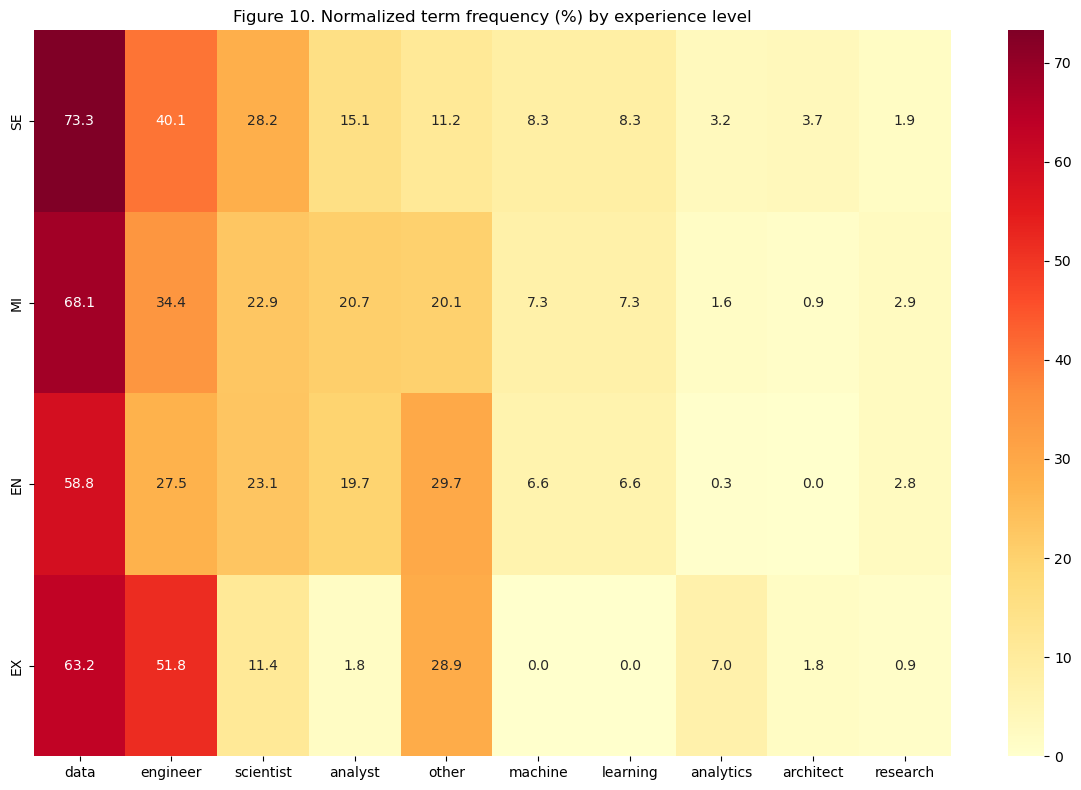

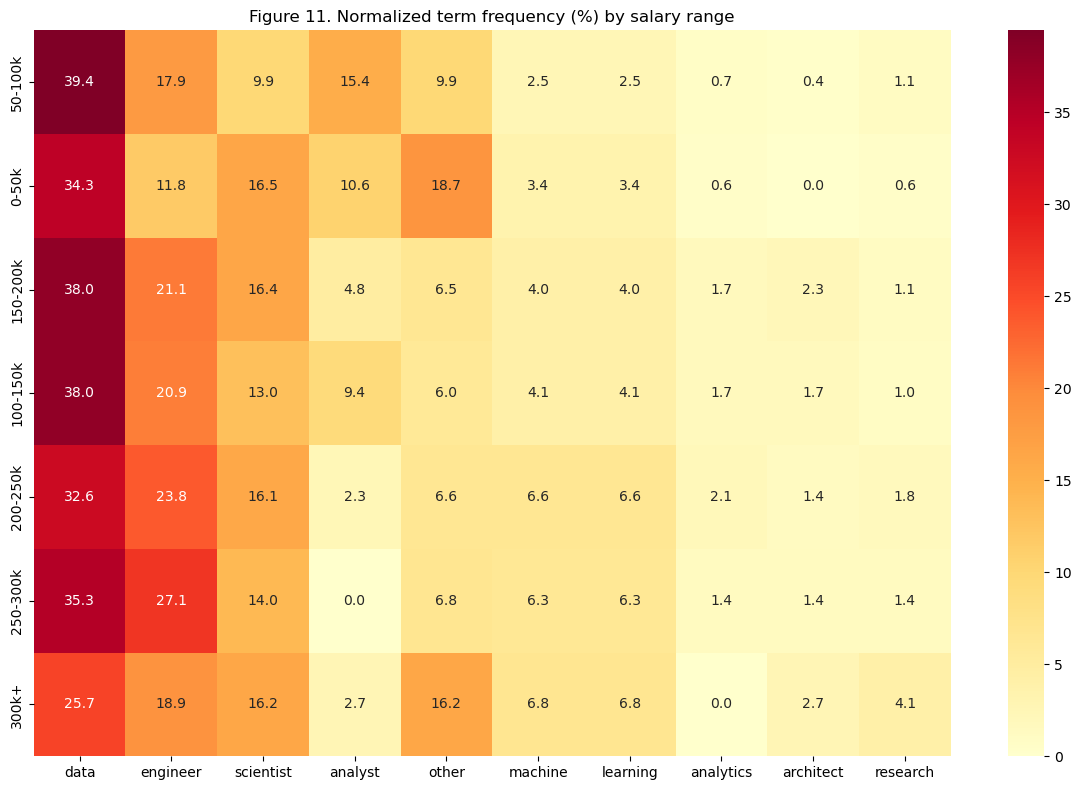

In [21]:
# Function to calculate normalized term percentages for a given subset of data
def calculate_normalized_term_percentages(subset_df):
    term_counts = {}
    for term in most_freq_terms.index:
        term_counts[term] = subset_df['job_title'].str.contains(term, case=False).sum()
    total_count = sum(term_counts.values())
    return {term: (count / total_count) * 100 for term, count in term_counts.items()}

# Analyze terms by salary bin
salary_term_percentages = {}
for bin in df['salary_bin'].unique():
    subset = df[df['salary_bin'] == bin]
    salary_term_percentages[bin] = calculate_normalized_term_percentages(subset)

# Heatmap of normalized term frequency by experience level
term_exp_matrix = pd.DataFrame(experience_term_percentages).T
plt.figure(figsize=(12, 8))
sns.heatmap(term_exp_matrix, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Figure 10. Normalized term frequency (%) by experience level')
plt.tight_layout()
plt.show()

# Heatmap of normalized term frequency by salary bin
term_salary_matrix = pd.DataFrame(salary_term_percentages).T
plt.figure(figsize=(12, 8))
sns.heatmap(term_salary_matrix, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Figure 11. Normalized term frequency (%) by salary range')
plt.tight_layout()
plt.show()

The 2 approaches differ in one crucial way: the upper plots (Figure 6-9) use absolute frequencies per term and category, i.e. they show how many job titles of experience level x used the term y, while the lower figures (10-11) use relative frequencies in relation to the most used terms displayed along the x-axis. I prefer these lower plots as they show more clearly the counts of terms compared with one another over the raw frequency.

My interpretation of this is that terms like 'engineer' fit to advanced roles in terms of experience and that terms like 'analyst' favor less paid jobs.

The term 'data' is too common and too frequently used to harbor any true meaning.

For well paid jobs it is recommendable to use the terms 'scientist' or 'engineer' for the job title, whereas many 'others' also match to the highest experience and payment. 

----

Next we apply an ANOVA test to see for statistical difference among the levels of experience, the job title and the dependent variable, the salary in USD.

In [22]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# One-way ANOVA for experience_level
experience_groups = [group for _, group in df.groupby('experience_level')['salary_in_usd']]
f_statistic, p_value = stats.f_oneway(*experience_groups)
print("One-way ANOVA results for experience_level:")
print(f"F-statistic: {f_statistic:.3f}")
print(f"p-value: {p_value:.7f}")

One-way ANOVA results for experience_level:
F-statistic: 310.844
p-value: 0.0000000


In [23]:
# Doing the same test for the job_title is not as easy due to the overalpping nature of the terms
print(df.job_title.value_counts())
print('#'*50)
# we do it anyway just for the fun
job_title_groups = [group for _, group in df.groupby('job_title')['salary_in_usd']]
f_statistic, p_value = stats.f_oneway(*job_title_groups)
print("One-way ANOVA results for job_title:")
print(f"F-statistic: {f_statistic:.3f}")
print(f"p-value: {p_value:.7f}")

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
other                         572
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Applied Scientist              58
Data Science Manager           58
Name: count, dtype: int64
##################################################
One-way ANOVA results for job_title:
F-statistic: 35.955
p-value: 0.0000000


In [24]:
# t-test for Data Engineer and Data Scientist
data_engineer = df[df['job_title'] == 'Data Engineer']['salary_in_usd']
data_scientist = df[df['job_title'] == 'Data Scientist']['salary_in_usd']

t_stat, p_value = stats.ttest_ind(data_engineer, data_scientist, equal_var=False)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.7f}")

T-statistic: 0.694
P-value: 0.4878177


In [25]:
# Two-way ANOVA for experience_level and most_freq_terms
model = ols('salary_in_usd ~ C(experience_level) + C(job_title) + C(experience_level):C(job_title)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print("\nTwo-way ANOVA results:")
print(anova_table);


Two-way ANOVA results:
                                        sum_sq      df          F  \
C(experience_level)               7.435726e+11     3.0  84.046335   
C(job_title)                      6.055907e+11     9.0  22.816729   
C(experience_level):C(job_title)  3.212004e+11    27.0   4.033936   
Residual                          1.097050e+13  3720.0        NaN   

                                        PR(>F)  
C(experience_level)               1.302360e-52  
C(job_title)                      1.439179e-26  
C(experience_level):C(job_title)  1.513904e-10  
Residual                                   NaN  


/Users/inuit/miniconda3/envs/image_analysis_env/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 6
  warnings.warn('covariance of constraints does not have full '
/Users/inuit/miniconda3/envs/image_analysis_env/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 24
  warnings.warn('covariance of constraints does not have full '


The two-way ANOVA results indicate significant effects of both experience level and job title on salary, as well as their interaction. The F-statistic for experience level is 226.242 with a p-value of 0.000, suggesting a strong influence on salary. Similarly, the job title has an F-statistic of 42.882 and a p-value of 0.000, indicating its significant impact. The interaction between experience level and job title also shows significance with an F-statistic of 4.034 and a p-value of 0.000.

However, a warning was issued regarding the covariance of constraints not having full rank. Specifically, for the experience level factor, there are 9 constraints but only a rank of 5, and for the interaction term, there are 27 constraints but only a rank of 24. This indicates redundancy among the predictors, likely due to multicollinearity or improper dummy variable coding. Multicollinearity occurs when predictors are highly correlated, making some constraints redundant (most frequent terms). This redundancy can affect the stability and reliability of the model, leading to less accurate coefficient estimates. To address this, it is essential to check for multicollinearity and ensure proper coding of dummy variables to avoid redundant predictors.

**We basically know now that there is a significant difference in salary depending on the 2 factors but can not pinpoint to precise cause.**

Number of unique work years: 4
One-way ANOVA results for work_year:
F-statistic: 76.018
p-value: 0.0000000


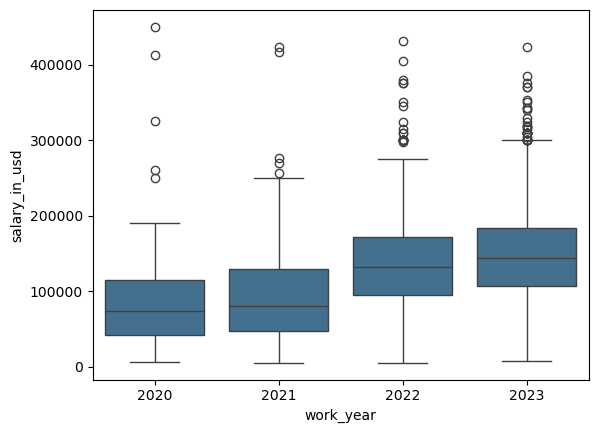

In [26]:
# work year and salary

sns.boxplot(x='work_year', y='salary_in_usd', data=df, saturation=0.5)

# perform one-way anova
print("Number of unique work years:", df['work_year'].nunique())

# Perform one-way ANOVA for work_year
work_year_groups = [group for _, group in df.groupby('work_year')['salary_in_usd']]
f_statistic, p_value = stats.f_oneway(*work_year_groups)
print("One-way ANOVA results for work_year:")
print(f"F-statistic: {f_statistic:.3f}")
print(f"p-value: {p_value:.7f}")

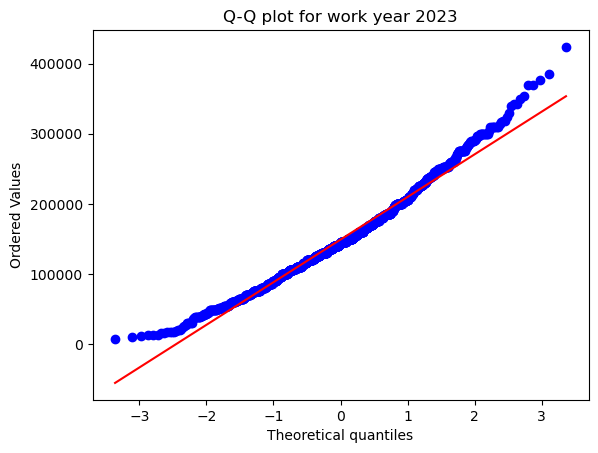

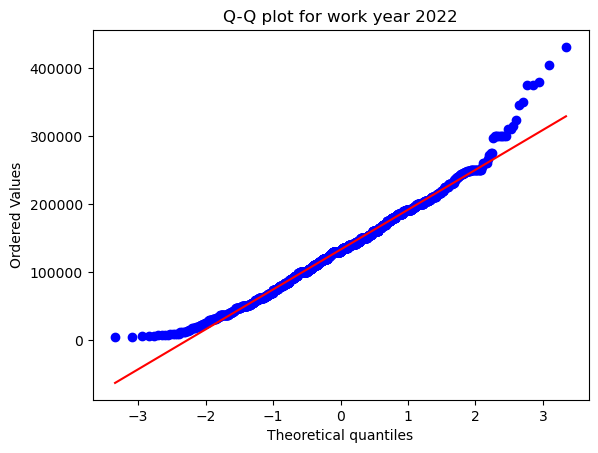

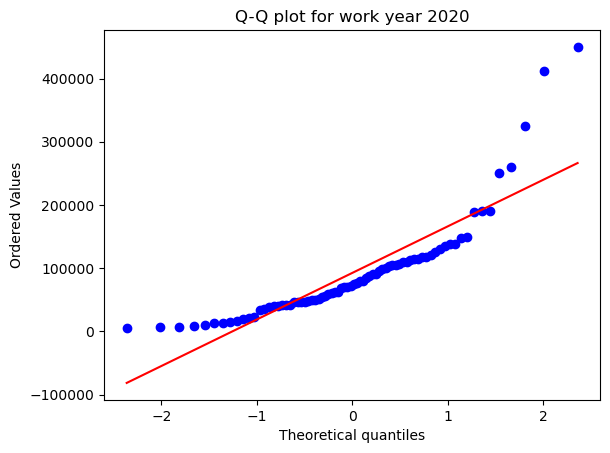

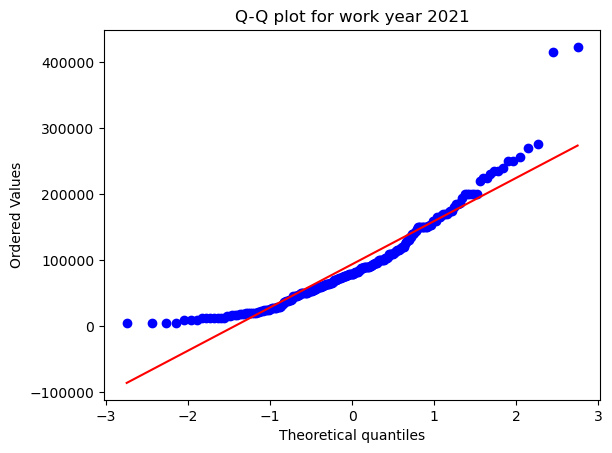

Levene's test for homogeneity of variances: W-statistic=1.532, p-value=0.2041025


In [28]:
# the results are a bit surprising, so we check the data quality by checking the distribution of the work years + similar variance

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Check for normality using Q-Q plots
for year in df['work_year'].unique():
    stats.probplot(df[df['work_year'] == year]['salary_in_usd'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot for work year {year}')
    plt.show()

# Check for homogeneity of variances using Levene's test
levene_stat, levene_p = stats.levene(*work_year_groups)
print(f"Levene's test for homogeneity of variances: W-statistic={levene_stat:.3f}, p-value={levene_p:.7f}")

We observe a non-normal distribution for every year which is expressed by fairly normally distributed central values but rather vast extreme values, being unusually low or high for a Gaussian.

After all, the changes over the 4 years and the changes in extremes demand caution to interpret the ANOVA test results, as the assumptions are a normal distribution of factors, independent sampling and similar variance.

**Despite this caveat, a difference in payment in comparison to work year can be neglected.**


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select the relevant columns
X = df[['remote_ratio', 'employee_residence', 'currency_region']]
y = df['salary_in_usd']

# Create a ColumnTransformer to handle both numeric and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['remote_ratio']),
        ('cat', OneHotEncoder(drop='first'), ['employee_residence', 'currency_region'])
    ])

# Fit the preprocessor and transform the data
X_encoded = preprocessor.fit_transform(X)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_encoded, y)

# Calculate R-squared
r2 = r2_score(y, model.predict(X_encoded))

print(f"R-squared: {r2:.4f}")
print(f"The model explains {r2*100:.2f}% of the variance in salary_in_usd.")

# Calculate individual variable contributions
feature_names = (['remote_ratio'] + 
                 [f'employee_residence_{cat}' for cat in preprocessor.named_transformers_['cat'].categories_[0][1:]] +
                 [f'currency_region_{cat}' for cat in preprocessor.named_transformers_['cat'].categories_[1][1:]])

importances = model.coef_**2 / np.sum(model.coef_**2)
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nRelative importance of each feature:")
for index, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Calculate variance explained by each original variable
remote_ratio_importance = feature_importance[feature_importance['feature'] == 'remote_ratio']['importance'].sum()
employee_residence_importance = feature_importance[feature_importance['feature'].str.startswith('employee_residence')]['importance'].sum()
currency_region_importance = feature_importance[feature_importance['feature'].str.startswith('currency_region')]['importance'].sum()

print("\nVariance explained by each original variable:")
print(f"remote_ratio: {remote_ratio_importance*r2*100:.2f}%")
print(f"employee_residence: {employee_residence_importance*r2*100:.2f}%")
print(f"currency_region: {currency_region_importance*r2*100:.2f}%")

R-squared: 0.2754
The model explains 27.54% of the variance in salary_in_usd.

Relative importance of each feature:
employee_residence_other: 0.2311
employee_residence_ES: 0.2002
employee_residence_IN: 0.1860
employee_residence_FR: 0.1713
currency_region_us: 0.0869
currency_region_south asia: 0.0583
employee_residence_GB: 0.0319
employee_residence_DE: 0.0204
employee_residence_US: 0.0106
currency_region_other: 0.0025
currency_region_europe: 0.0008
remote_ratio: 0.0000

Variance explained by each original variable:
remote_ratio: 0.00%
employee_residence: 23.46%
currency_region: 4.09%


It seems that the linear model based on currency_region, employee_residence and remote_ratio can explain a fair portion of the variance of the salary, and it seems that the remote feature has nothing to do with it. 

To validate these results a set of different models could be tested (1), several other features could be referred to, but we stop at this point with the conclusion that the premise that the location of employee impacts the salary which is a reasonable one.

**It can always be done more!**